# Salary Projections by Degree vs Degree Popularity

### Summary

This analysis attempts to find relationship between NACE salary projection data for specific degrees and NCES degree popularity data for years when data is available for both. 

##### Preparing NCES degree popularity data

- The bulk of data cleaning and formatting was performed using spreadsheets prior to exporting to csv. Per instruction this was not uploaded to repo but can be found [here](https://docs.google.com/spreadsheets/d/11Q0bDMa9DZ216V0jylm8nLQnoD6onql_xNSoIMpHkzM/edit?usp=sharing).
- Ranges of interest were sliced into separate dataframes for clarity when plotting

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
!cat Degree_Demand_export.csv











Information Sciences & Systems,10,59518,64405,71420,79598,88633,NA,NA,NA,0.031,0.034,0.037,0.040,0.044,NA,NA,NA,59569,59810,64533,64638,66705,65690,70336,74420,NA,0.0040,0.0790,0.0016,0.0320,-0.0152,0.0707,0.0581

In [3]:
salary_by_degree = pd.read_csv('Degree_Demand_export.csv').T
salary_by_degree

,0,1,2,3,4,5,6,7,8,9
Degree,Mechanical Engineering,Computer Science,Electrical Engineering,Finance,Management Information Systems,Computer Engineering,Accounting,Business Administration/Mgmt.,Logistics/Supply Chain,Information Sciences & Systems
demand_rank,1,2,3,4,5,6,7,8,9,10
2015_degrees,26394,15633,14599,32727,7341,5593,50510,133896,3736,59518
2016_degrees,29216,23313,15680,35010,7634,6422,51108,135052,4487,64405
2017_degrees,32308,22289,16921,37437,7838,7290,50688,138217,5128,71420
2018_degrees,35181,26313,16900,39479,8335,8266,50128,138905,5494,79598
2019_degrees,36817,30140,17584,40895,8429,8882,48790,140218,5739,88633
2020_degrees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021_degrees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022_degrees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#setting column names as degree, replacing space with _
col_names = salary_by_degree.iloc[0]
for i in range(len(col_names)): col_names[i] = col_names[i].replace(' ','_')
salary_by_degree = salary_by_degree.iloc[1:]
salary_by_degree.columns = col_names
salary_by_degree

Degree,Mechanical_Engineering,Computer_Science,Electrical_Engineering,Finance,Management_Information_Systems,Computer_Engineering,Accounting,Business_Administration/Mgmt.,Logistics/Supply_Chain,Information_Sciences_&_Systems
demand_rank,1,2,3,4,5,6,7,8,9,10
2015_degrees,26394,15633,14599,32727,7341,5593,50510,133896,3736,59518
2016_degrees,29216,23313,15680,35010,7634,6422,51108,135052,4487,64405
2017_degrees,32308,22289,16921,37437,7838,7290,50688,138217,5128,71420
2018_degrees,35181,26313,16900,39479,8335,8266,50128,138905,5494,79598
2019_degrees,36817,30140,17584,40895,8429,8882,48790,140218,5739,88633
2020_degrees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021_degrees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022_degrees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015_rel_pop,0.014,0.008,0.008,0.017,0.004,0.003,0.027,0.071,0.002,0.031


In [5]:
#extract relative popularity data
popdata = salary_by_degree.iloc[9:14]
popdata

Degree,Mechanical_Engineering,Computer_Science,Electrical_Engineering,Finance,Management_Information_Systems,Computer_Engineering,Accounting,Business_Administration/Mgmt.,Logistics/Supply_Chain,Information_Sciences_&_Systems
2015_rel_pop,0.014,0.008,0.008,0.017,0.004,0.003,0.027,0.071,0.002,0.031
2016_rel_pop,0.015,0.012,0.008,0.018,0.004,0.003,0.027,0.07,0.002,0.034
2017_rel_pop,0.017,0.011,0.009,0.019,0.004,0.004,0.026,0.071,0.003,0.037
2018_rel_pop,0.018,0.013,0.009,0.02,0.004,0.004,0.025,0.07,0.003,0.04
2019_rel_pop,0.018,0.015,0.009,0.02,0.004,0.004,0.024,0.07,0.003,0.044


In [6]:
saldata = salary_by_degree.iloc[17:25]
saldata

Degree,Mechanical_Engineering,Computer_Science,Electrical_Engineering,Finance,Management_Information_Systems,Computer_Engineering,Accounting,Business_Administration/Mgmt.,Logistics/Supply_Chain,Information_Sciences_&_Systems
2015_proj_sal,63501,59569,64081,52788,55843,62553,51475,51196,53024,59569
2016_proj_sal,65593,59810,66269,53499,56846,65606,52405,51831,55246,59810
2017_proj_sal,65557,64533,66920,55609,59642,68191,54838,54019,55694,64533
2018_proj_sal,66659,64638,67358,56809,60583,69510,55264,54660,56823,64638
2019_proj_sal,70329,66705,70635,58464,61697,68778,57511,57133,57060,66705
2020_proj_sal,69913,65690,72518,58472,63445,71107,57734,58166,59180,65690
2021_proj_sal,70345,70336,71799,58845,63565,76890,58508,58207,60273,70336
2022_proj_sal,72825,74420,75558,60776,66117,76029,59884,59514,61798,74420


In [7]:
salchangedata = salary_by_degree.iloc[25:]
salchangedata

Degree,Mechanical_Engineering,Computer_Science,Electrical_Engineering,Finance,Management_Information_Systems,Computer_Engineering,Accounting,Business_Administration/Mgmt.,Logistics/Supply_Chain,Information_Sciences_&_Systems
2015_pct_change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016_pct_change,0.0329,0.004,0.0341,0.0135,0.018,0.0488,0.0181,0.0124,0.0419,0.004
2017_pct_change,-0.0005,0.079,0.0098,0.0394,0.0492,0.0394,0.0464,0.0422,0.0081,0.079
2018_pct_change,0.0168,0.0016,0.0065,0.0216,0.0158,0.0193,0.0078,0.0119,0.0203,0.0016
2019_pct_change,0.0551,0.032,0.0487,0.0291,0.0184,-0.0105,0.0407,0.0452,0.0042,0.032
2020_pct_change,-0.0059,-0.0152,0.0267,0.0001,0.0283,0.0339,0.0039,0.0181,0.0372,-0.0152
2021_pct_change,0.0062,0.0707,-0.0099,0.0064,0.0019,0.0813,0.0134,0.0007,0.0185,0.0707
2022_pct_change,0.0353,0.0581,0.0524,0.0328,0.0401,-0.0112,0.0235,0.0225,0.0253,0.0581


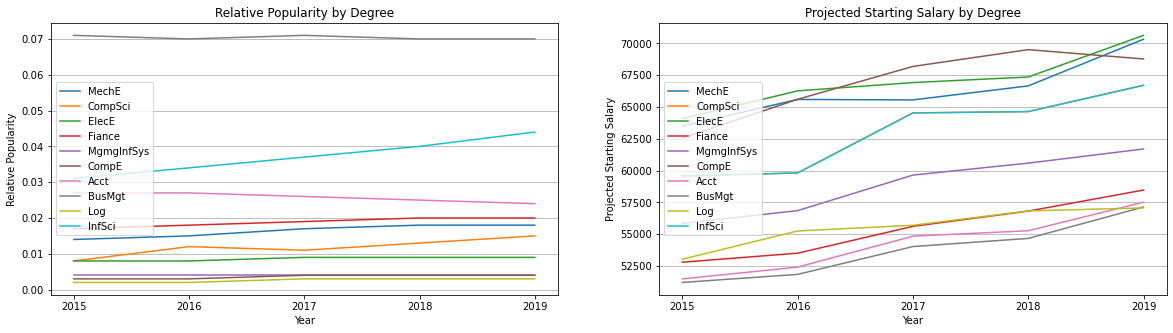

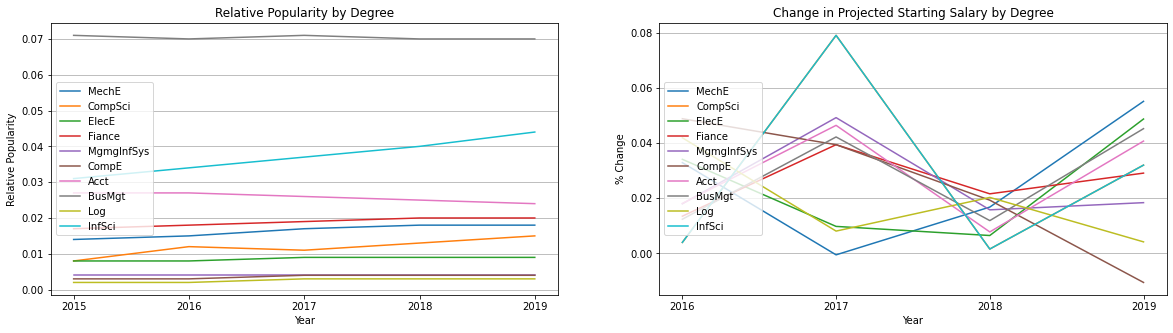

In [16]:
##graphs all years with salary data - matching years only
#build first set of graphs
plt.figure(figsize =(20,5))
ax = plt.subplot(1,2,1)
xvalues=range(5)
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2015','2016','2017','2018','2019'])
plt.plot(xvalues,popdata['Mechanical_Engineering'])
plt.plot(xvalues,popdata['Computer_Science'])
plt.plot(xvalues,popdata['Electrical_Engineering'])
plt.plot(xvalues,popdata['Finance'])
plt.plot(xvalues,popdata['Management_Information_Systems'])
plt.plot(xvalues,popdata['Computer_Engineering'])
plt.plot(xvalues,popdata['Accounting'])
plt.plot(xvalues,popdata['Business_Administration/Mgmt.'])
plt.plot(xvalues,popdata['Logistics/Supply_Chain'])
plt.plot(xvalues,popdata['Information_Sciences_&_Systems'])
plt.legend(['MechE','CompSci','ElecE','Fiance','MgmgInfSys','CompE','Acct','BusMgt','Log','InfSci'],loc=6)
plt.xlabel('Year')
plt.ylabel('Relative Popularity')
plt.title('Relative Popularity by Degree')
plt.grid(b=True, which='major',axis='y')

ax = plt.subplot(1,2,2)
xvalues = range(5)
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2015','2016','2017','2018','2019'])
plt.plot(xvalues,saldata.iloc[:5]['Mechanical_Engineering'])
plt.plot(xvalues,saldata.iloc[:5]['Computer_Science'])
plt.plot(xvalues,saldata.iloc[:5]['Electrical_Engineering'])
plt.plot(xvalues,saldata.iloc[:5]['Finance'])
plt.plot(xvalues,saldata.iloc[:5]['Management_Information_Systems'])
plt.plot(xvalues,saldata.iloc[:5]['Computer_Engineering'])
plt.plot(xvalues,saldata.iloc[:5]['Accounting'])
plt.plot(xvalues,saldata.iloc[:5]['Business_Administration/Mgmt.'])
plt.plot(xvalues,saldata.iloc[:5]['Logistics/Supply_Chain'])
plt.plot(xvalues,saldata.iloc[:5]['Information_Sciences_&_Systems'])
plt.legend(['MechE','CompSci','ElecE','Fiance','MgmgInfSys','CompE','Acct','BusMgt','Log','InfSci'],loc=6)
plt.xlabel('Year')
plt.ylabel('Projected Starting Salary')
plt.title('Projected Starting Salary by Degree')
plt.grid(b=True, which='major',axis='y')
plt.show()


#build second set of graphs
plt.figure(figsize =(20,5))
ax = plt.subplot(1,2,1)
xvalues=range(5)
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2015','2016','2017','2018','2019'])
plt.plot(xvalues,popdata['Mechanical_Engineering'])
plt.plot(xvalues,popdata['Computer_Science'])
plt.plot(xvalues,popdata['Electrical_Engineering'])
plt.plot(xvalues,popdata['Finance'])
plt.plot(xvalues,popdata['Management_Information_Systems'])
plt.plot(xvalues,popdata['Computer_Engineering'])
plt.plot(xvalues,popdata['Accounting'])
plt.plot(xvalues,popdata['Business_Administration/Mgmt.'])
plt.plot(xvalues,popdata['Logistics/Supply_Chain'])
plt.plot(xvalues,popdata['Information_Sciences_&_Systems'])
plt.legend(['MechE','CompSci','ElecE','Fiance','MgmgInfSys','CompE','Acct','BusMgt','Log','InfSci'],loc=6)
plt.xlabel('Year')
plt.ylabel('Relative Popularity')
plt.title('Relative Popularity by Degree')
plt.grid(b=True, which='major',axis='y')

ax = plt.subplot(1,2,2)
xvalues = range(5)
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['2015','2016','2017','2018','2019'])
plt.plot(xvalues,salchangedata.iloc[:5]['Mechanical_Engineering'])
plt.plot(xvalues,salchangedata.iloc[:5]['Computer_Science'])
plt.plot(xvalues,salchangedata.iloc[:5]['Electrical_Engineering'])
plt.plot(xvalues,salchangedata.iloc[:5]['Finance'])
plt.plot(xvalues,salchangedata.iloc[:5]['Management_Information_Systems'])
plt.plot(xvalues,salchangedata.iloc[:5]['Computer_Engineering'])
plt.plot(xvalues,salchangedata.iloc[:5]['Accounting'])
plt.plot(xvalues,salchangedata.iloc[:5]['Business_Administration/Mgmt.'])
plt.plot(xvalues,salchangedata.iloc[:5]['Logistics/Supply_Chain'])
plt.plot(xvalues,salchangedata.iloc[:5]['Information_Sciences_&_Systems'])
plt.legend(['MechE','CompSci','ElecE','Fiance','MgmgInfSys','CompE','Acct','BusMgt','Log','InfSci'],loc=6)
plt.xlabel('Year')
plt.ylabel('% Change')
plt.title('Change in Projected Starting Salary by Degree')
plt.grid(b=True, which='major',axis='y')
plt.show()